Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Load the Dataset (IMPORTANT)

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep=";")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Dataset Overview

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Task 1: Calculate Average Spending per Customer

Create Total Spending Column

In [4]:
spend_columns = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['Total_Spend'] = df[spend_columns].sum(axis=1)

df[['ID', 'Total_Spend']].head()

,ID,Total_Spend
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


Average Spending per Customer

In [5]:
average_spending = df['Total_Spend'].mean()
average_spending

np.float64(605.7982142857143)

Insight:

This value represents the average total amount spent by a customer across all product categories.

Task 2: Identify Top 10% of Spenders

Calculate Top 10% Threshold

In [6]:
top_10_threshold = df['Total_Spend'].quantile(0.90)
top_10_threshold

np.float64(1536.2000000000003)

Extract Top 10% Spenders

In [7]:
top_10_spenders = df[df['Total_Spend'] >= top_10_threshold]

top_10_spenders[['ID', 'Total_Spend']].head()

,ID,Total_Spend
0,5524,1617
18,6565,1782
21,5376,1730
29,1966,1672
51,4114,1693


In [8]:
top_10_spenders.shape

(224, 30)

Insight:

The top 10% of customers contribute a disproportionately high share of revenue and are ideal targets for loyalty programs.

Task 3: Detect Skewness in Customer Engagement Metrics

Engagement Metrics Used

NumWebVisitsMonth

NumWebPurchases

NumStorePurchases

Skewness Calculation

In [9]:
engagement_columns = [
    'NumWebVisitsMonth',
    'NumWebPurchases',
    'NumStorePurchases'
]

df[engagement_columns].skew()

NumWebVisitsMonth    0.207926
NumWebPurchases      1.382794
NumStorePurchases    0.702237
dtype: float64

How to interpret:

Positive skew (> 0): Most customers show low engagement, few are highly active

Negative skew (< 0): Most customers are highly engaged

Visualize Engagement Skewness

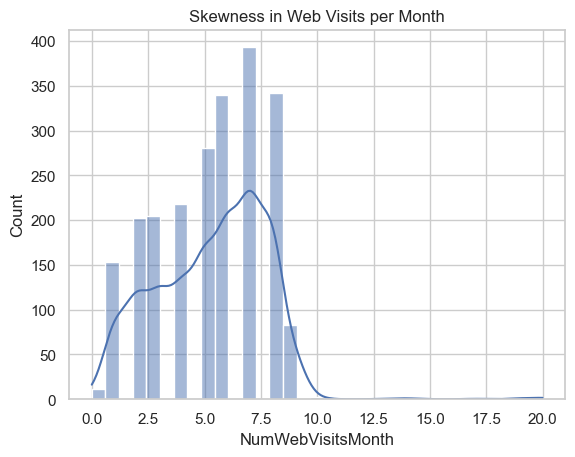

In [10]:
plt.figure()
sns.histplot(df['NumWebVisitsMonth'], kde=True)
plt.title("Skewness in Web Visits per Month")
plt.show()

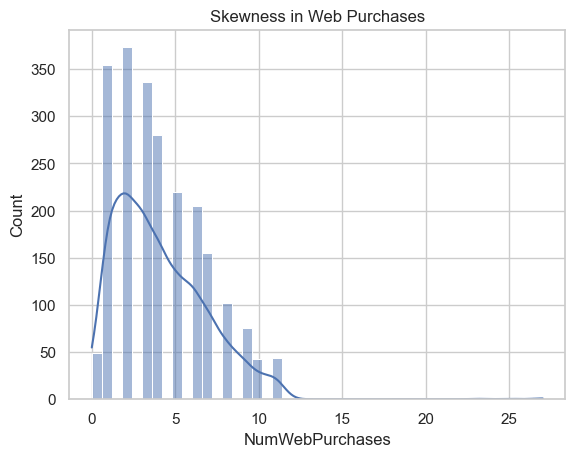

In [11]:
plt.figure()
sns.histplot(df['NumWebPurchases'], kde=True)
plt.title("Skewness in Web Purchases")
plt.show()

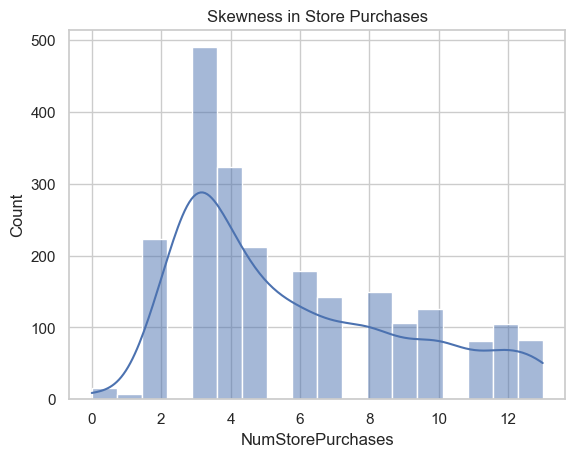

In [12]:
plt.figure()
sns.histplot(df['NumStorePurchases'], kde=True)
plt.title("Skewness in Store Purchases")
plt.show()

Final Insights

Average customer spending provides a baseline revenue benchmark.

The top 10% of spenders represent high-value customers.

Engagement metrics are right-skewed, meaning most customers show low interaction.

Marketing efforts should focus on retaining high spenders and increasing engagement among low-activity customers.